In [1]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize_scalar
from scipy import interpolate

Create grids for next period's capital holdings

In [17]:
def create_grids(n, theta):

    zero_grid=np.linspace(0, 1, n).reshape(-1,1)

    k_grid=np.zeros(shape=(n,1))

    k_ss_low  = 0.01

    k_ss_high  = 2
    
    #for i in range(len(new_grid)):
        #k_grid[i] =  low_bound + ( up_bound - low_bound ) * (new_grid[i] ** 1)

    for i in range(len(zero_grid)):
        k_grid[i] =  (0.25 * k_ss_low) + ( (1.5 * k_ss_high) - (0.25 * k_ss_low) ) * (zero_grid[i] ** theta)

    return k_grid 

define various utility functions

In [8]:
def u(c, gamma):
    if gamma == 1:
        return np.log(c)
    else:
        return ((c ** (1 - gamma))/( 1 - gamma))

In [9]:
def u_ces(c,gamma, beta):
    return (1 - beta) * (c) ** (1-gamma)

define the production function

In [10]:
def f(A, alpha, delta, k):
    return A * (k ** alpha) + (1 - delta) * k

Let's now begin with the endogenous grid method

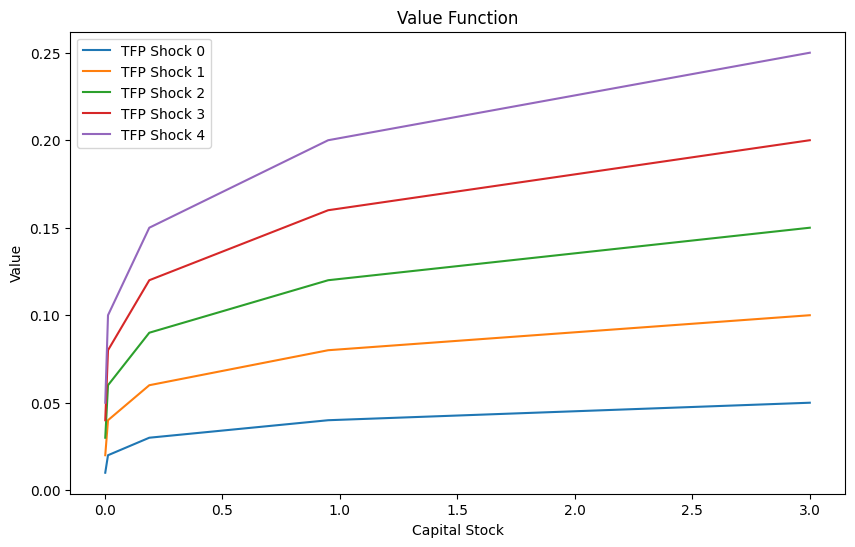

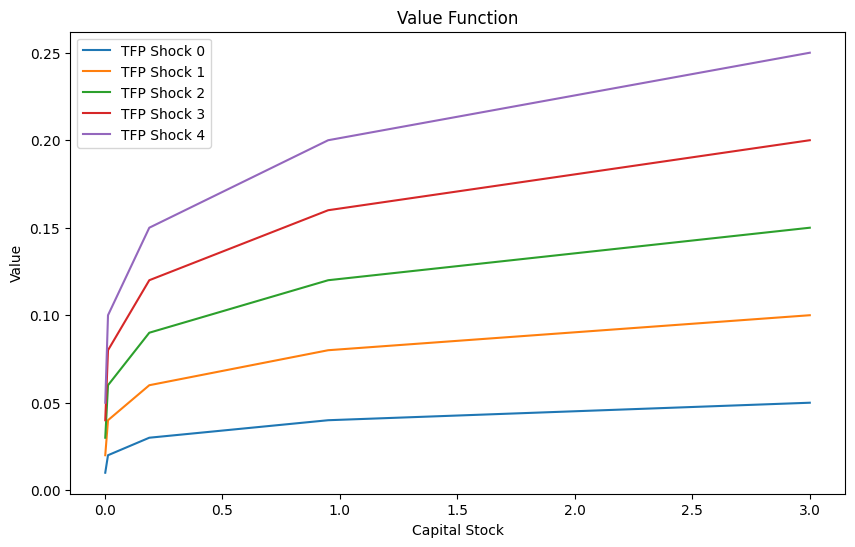

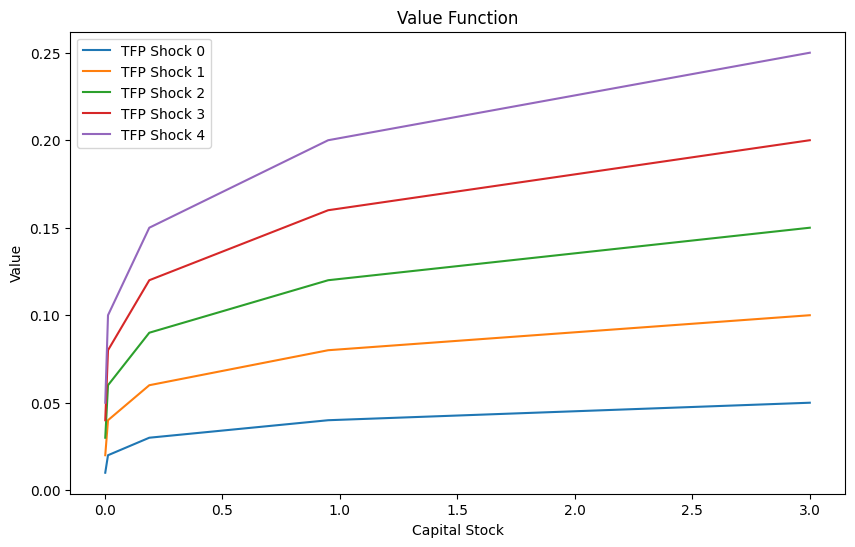

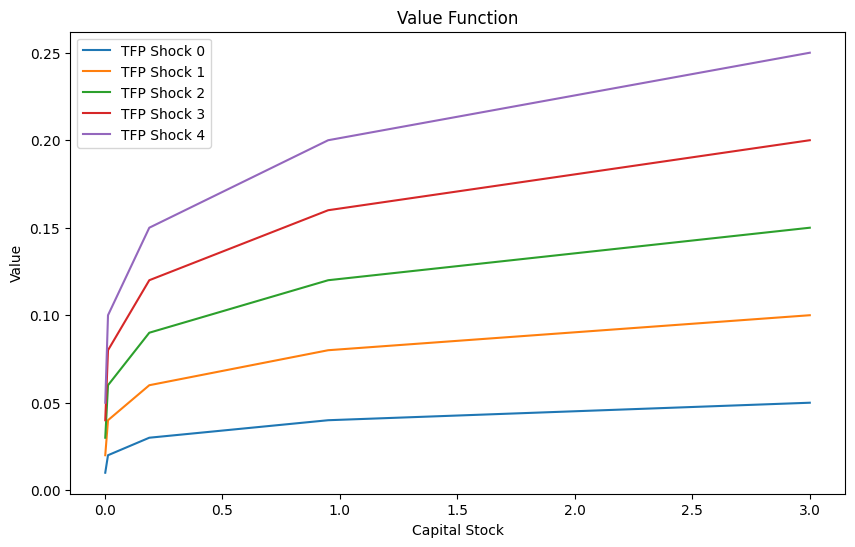

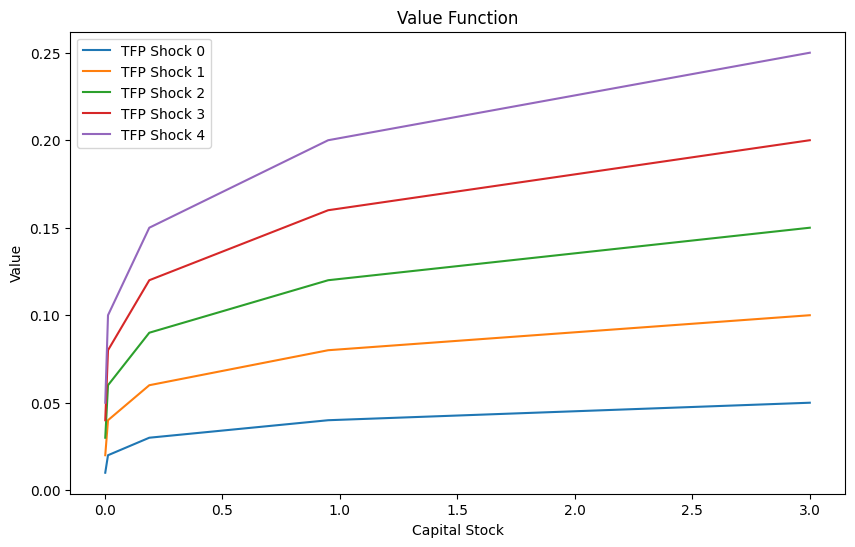

In [22]:
k_grid = create_grids(5, 4)
V = np.zeros((5, 5))

for i in range(len(V[0])):
    for j in range(len(V[1])):
        V[i,j]=(0.01*(i+1))*(j+1)

#for j in range(len(V[1])):
    #print(f'column {j}')
    #print(V[:,j])

for j in range(len(V[1])):
    # plt.plot(f'column {j}')

    fig, ax = plt.subplots(figsize=(10, 6))
    for j in range(len(V[1])):
        ax.plot(k_grid, V[:, j], label=f'TFP Shock {j}')

    ax.set_title('Value Function')
    ax.set_xlabel('Capital Stock')
    ax.set_ylabel('Value')
    ax.legend()
    plt.show()


In [ ]:
def egm(n_k, n_z, theta, rho, sigma, mu, A, delta, max_iter ):
    # First, discretise an AR1 process using Rouwenhorst's method
    mc = qe.markov.approximation.rouwenhorst(n_z, rho, sigma, mu)
    z, Pi = mc.state_values, mc.P

    # Create capital and shock grids
    z_grid = z
    k_grid = create_grids(n_k, theta)

    # Initialise value and policy functions
    V = np.zeros((n_k, n_z))

    # Make V increasing in the k and z directions
    for i in range(len(V[0])):
        for j in range(len(V[1])):
            V[i,j]=(0.01*(i+1))*(j+1)

    G_kp = np.zeros((n_k, n_z))

    G_kp_old = np.zeros((n_k, n_z))

    it = 0

    for it in range(max_iter):

        V_new = np.copy(V)

        for i in range(len(n_k)):
            for j in range(len(n_z)):

                # Need to define "total resources" state variable

                total_resources = np.exp( A * z[j] ) * k_grid[i] + (1-delta) * k_grid[i]

                # Consumption implied by the first-order conditions of the model
                c_star = 


                # Expected values

                expected_value = np.dot()

                v_bold = beta * 

